<a href="https://colab.research.google.com/github/learnvisionAI/ObjectDetection_YOLO/blob/main/Session2_YOLOV8_Obj_Detection_CustomDataset/Potholes_Detection__Step_by_Step_Large_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [1]:
import os
import glob
from IPython.display import Image, display
from IPython import display

# **In the First Step, We need to check whether we have access to the GPU or not**

In [2]:
!nvidia-smi

Sat Jan  6 02:19:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
HOME = os.getcwd()

In [4]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [5]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=88854813db2cce438127300671e0bf0aa1412a1cc0cc4d9f68d6ee750bd6254a
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


##Checking whether YOLOv8 is Installed and its working Fine

In [6]:
import ultralytics

In [7]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

##### https://universe.roboflow.com/devashish-workspace/pothole-detection-2-28w0d/dataset/2/images/?split=train&numImages=60

In [9]:
!mkdir {HOME}/datasets


In [10]:
!pwd

/content


In [11]:
%cd {HOME}/datasets


/content/datasets


In [12]:
!pwd

/content/datasets


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="16XuuBsC5XqwYkDJ8HdL")
project = rf.workspace("devashish-workspace").project("pothole-detection-2-28w0d")
dataset = project.version(2).download("yolov5")

  Using cached roboflow-1.1.15-py3-none-any.whl (69 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.17.1-py3-none-any.whl (77 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl (13 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstal

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-Detection-2-2 in yolov5pytorch:: 100%|██████████| 3202/3202 [00:00<00:00, 3715.64it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [14]:
%cd {HOME}

/content


In [15]:
%cd {dataset.location}

/content/datasets/Pothole-Detection-2-2


In [16]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Pothole-Detection-2-2/data.yaml epochs=70 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 75.1MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Pothole-Detection-2-2/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, mo

In [17]:
!ls {HOME}//runs/detect/train

args.yaml					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1704507734.0a1d9029bfca.1147.0  train_batch0.jpg	 val_batch1_labels.jpg
F1_curve.png					    train_batch1.jpg	 val_batch1_pred.jpg
P_curve.png					    train_batch2.jpg	 val_batch2_labels.jpg
PR_curve.png					    train_batch5280.jpg  val_batch2_pred.jpg
predictions.json				    train_batch5281.jpg  weights
R_curve.png					    train_batch5282.jpg


#**Displaying the Confusion Matrix**

/content


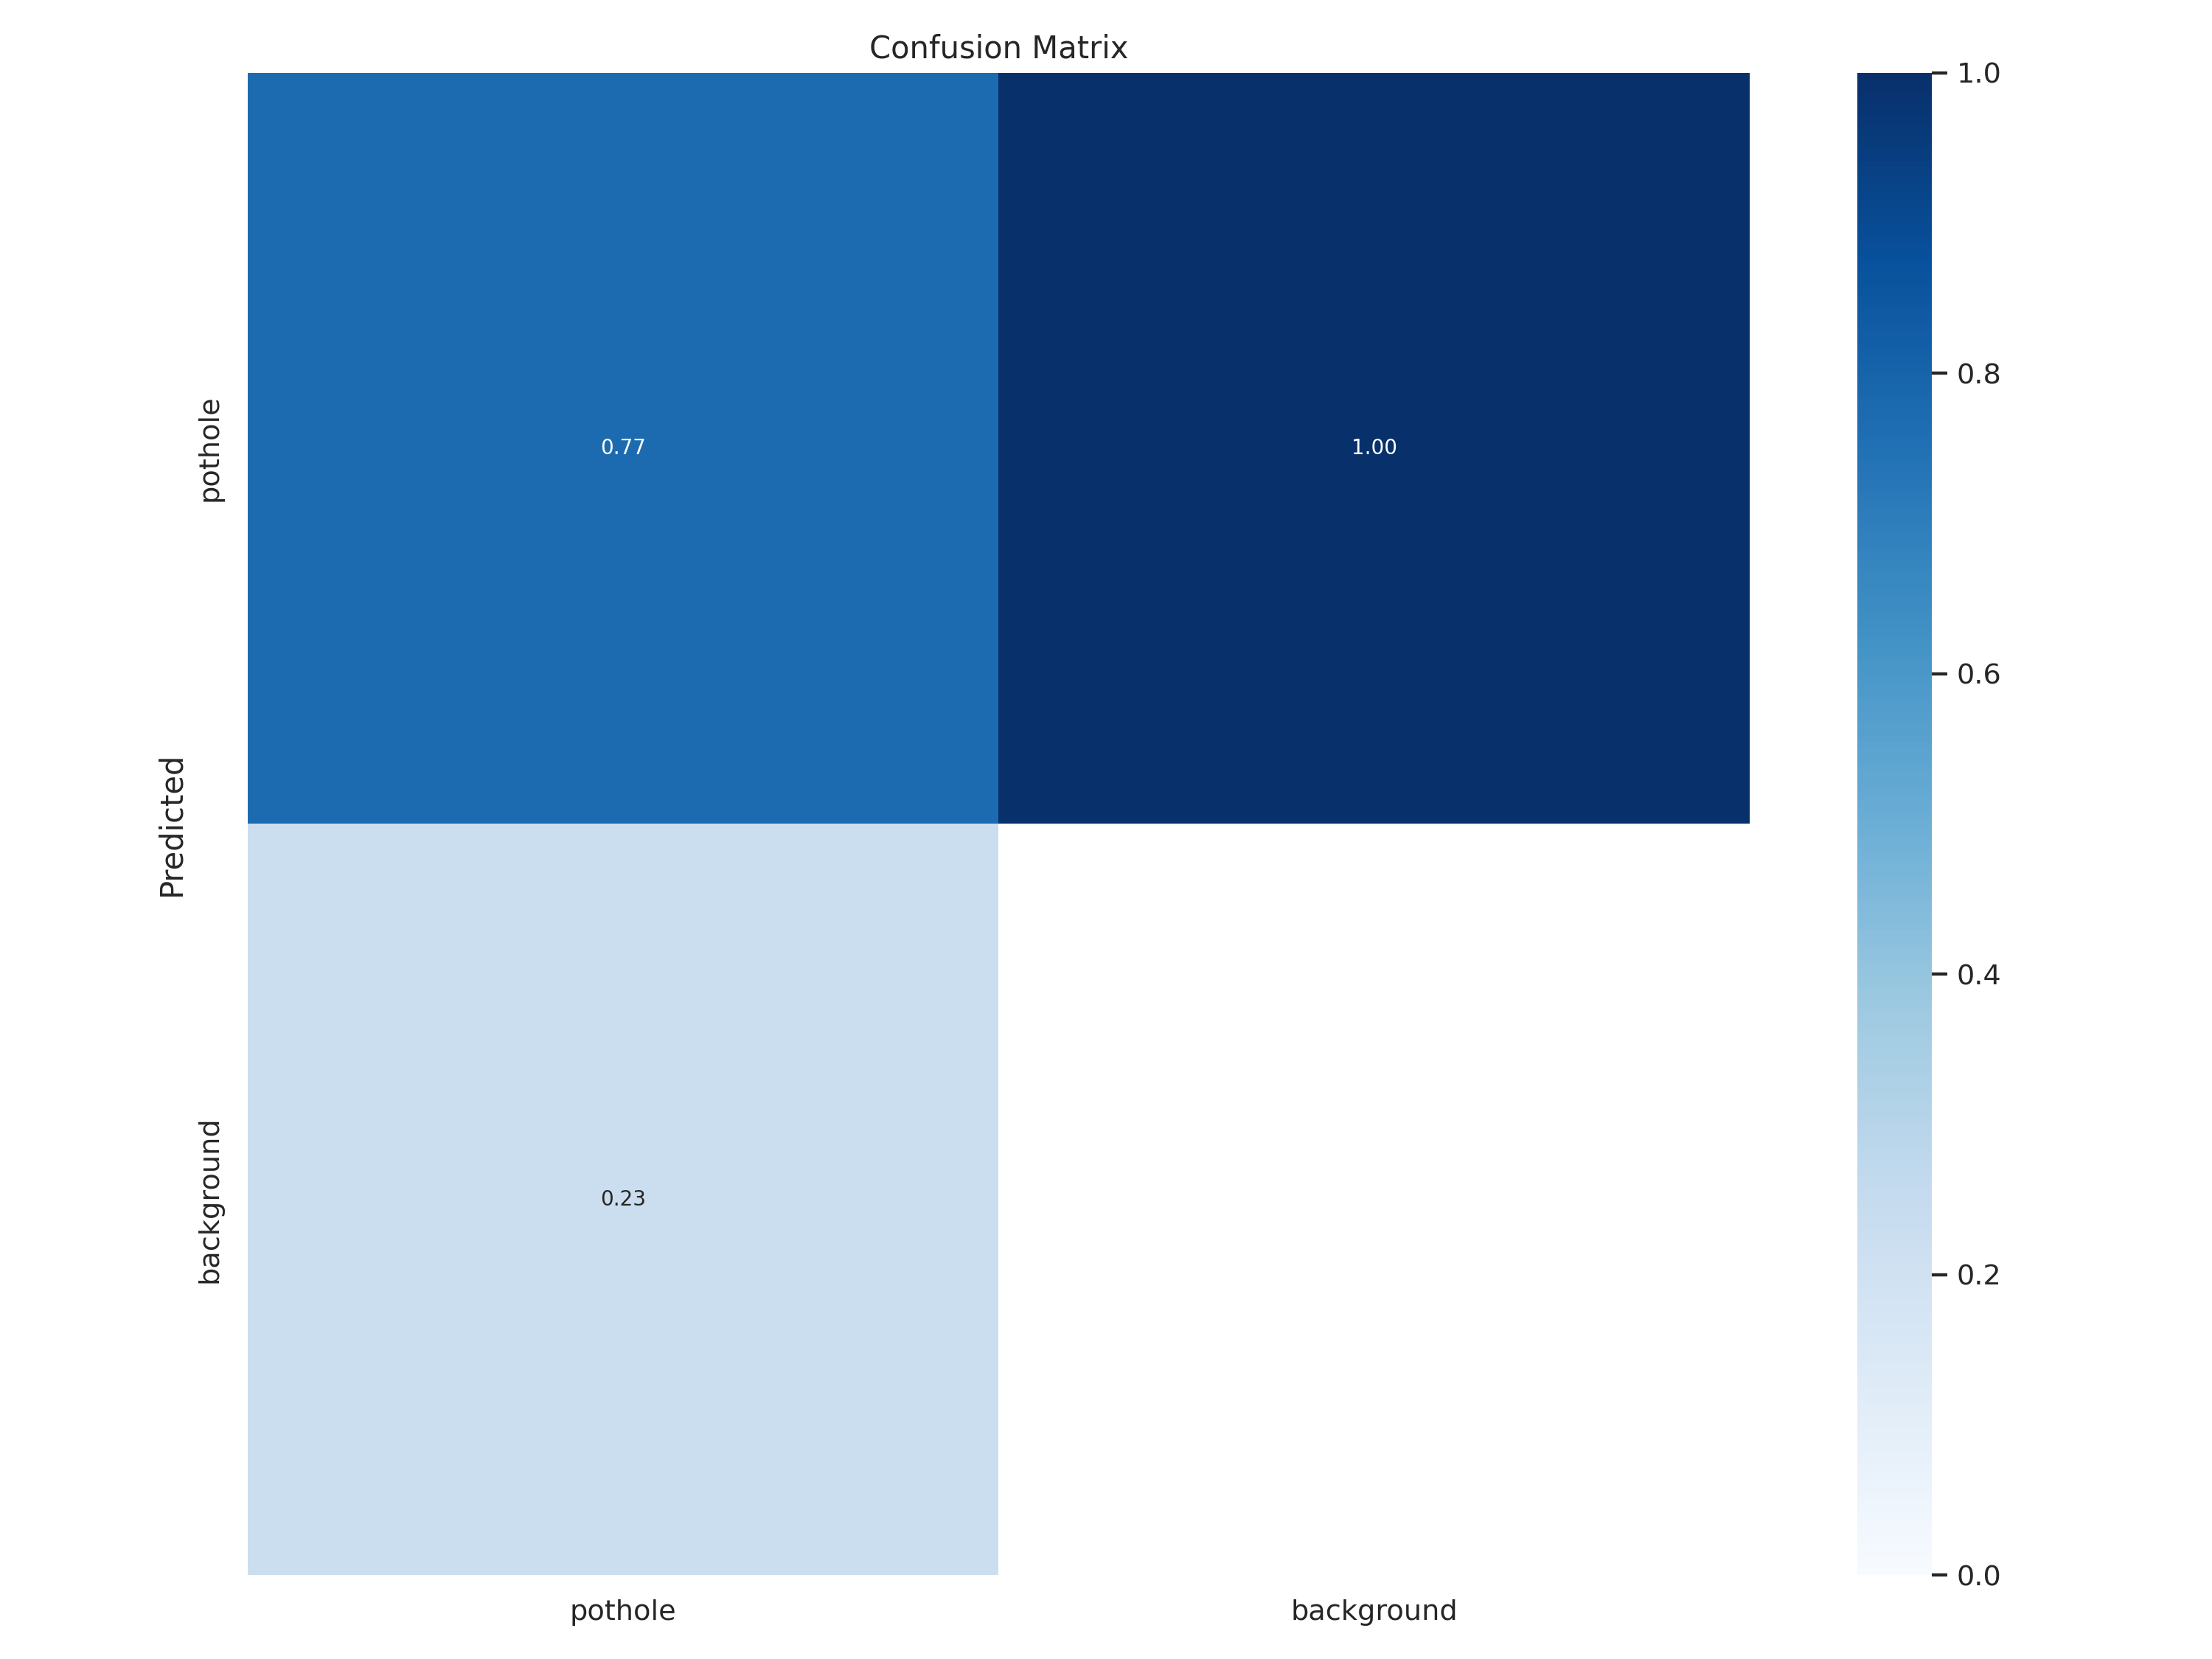

In [18]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


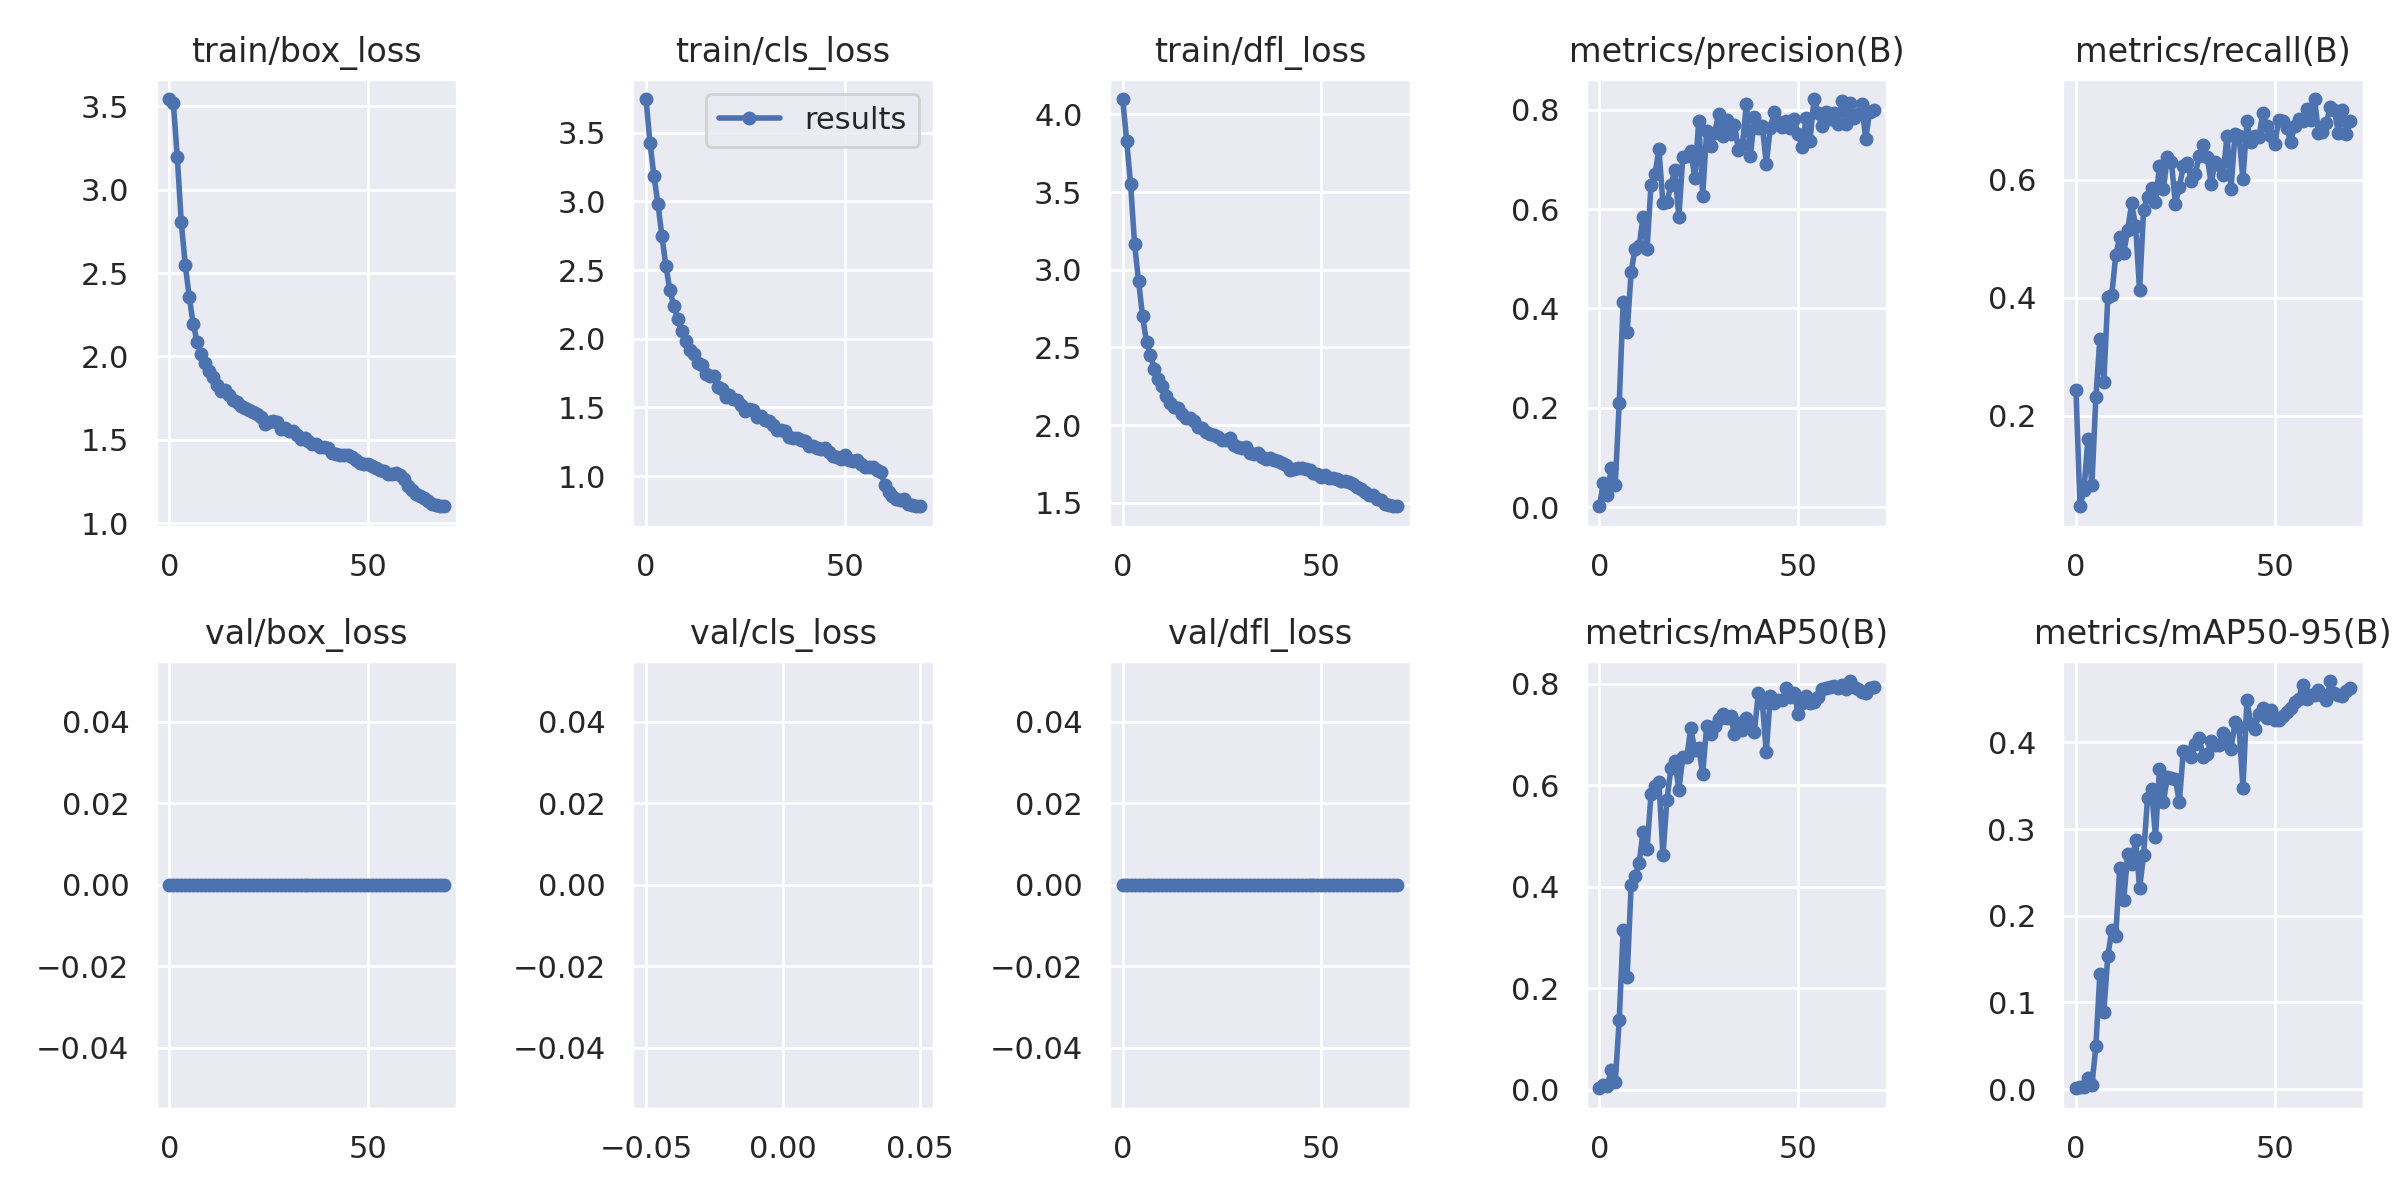

In [20]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

/content


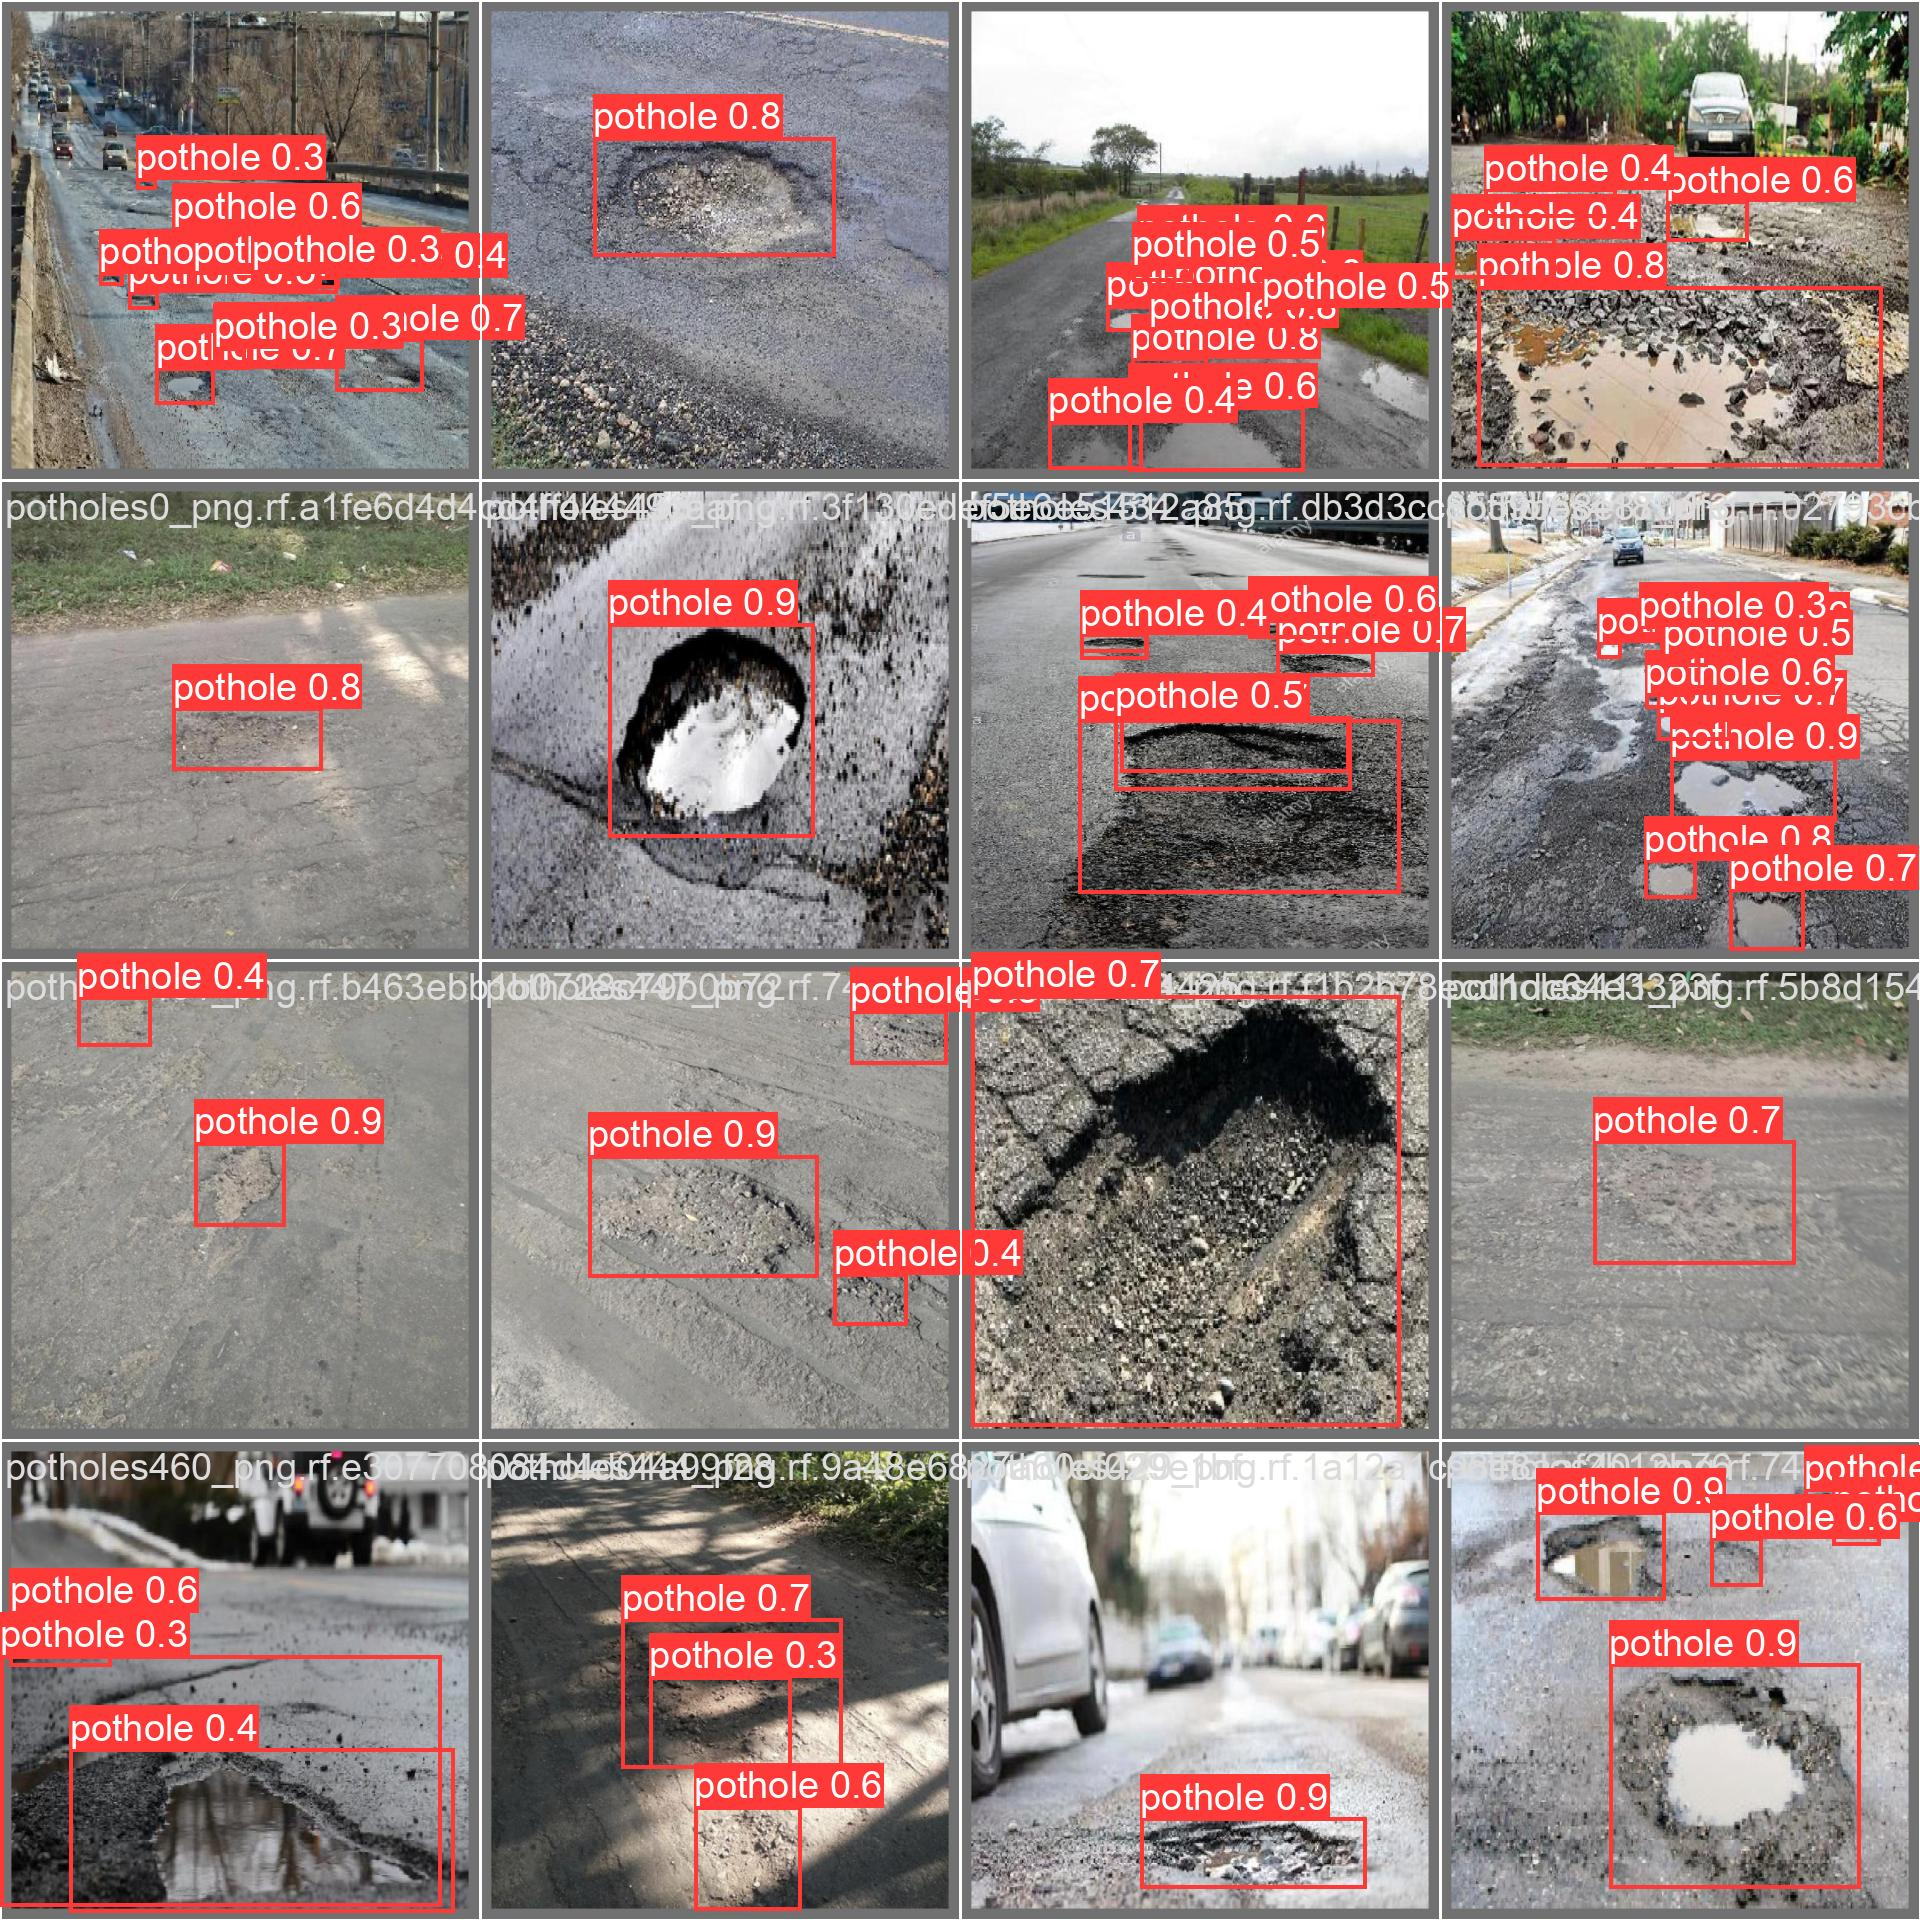

In [22]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

#**Validate Custom Model**

In [ ]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/potholeDetectionYoloV8-2/data.yaml

#**Inference with Custom Model**

In [24]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Pothole-Detection-2-2/test/images

/content
2024-01-06 03:32:57.788185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 03:32:57.788254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 03:32:57.790032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 03:32:59.326848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/67 /content/datasets/Pothole-Detection-2-2/test

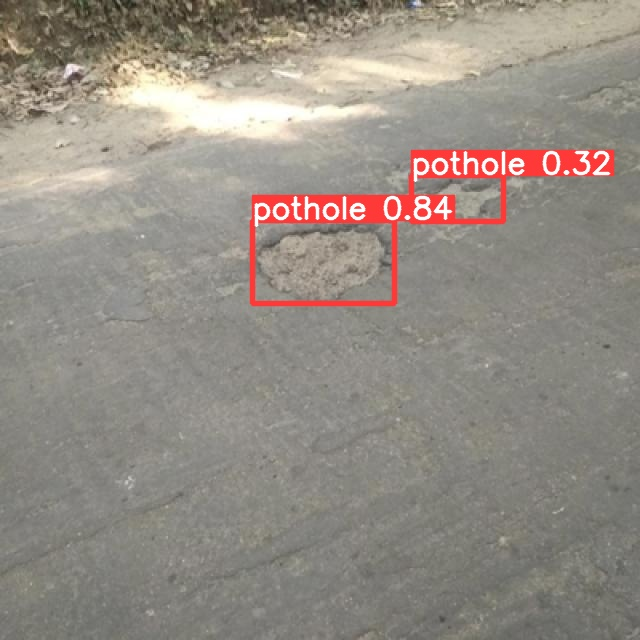

In [25]:
Image("/content/runs/detect/predict2/potholes117_png.rf.d4446805a12b1341b3438642f39870c0.jpg")

## Test on Demo Images from previous dataset where prediction was not great

In [32]:
!mkdir new_testset

In [37]:
%cd {HOME}/new_testset

/content/new_testset


In [38]:
!gdown 'https://drive.google.com/uc?id=198IvMQRfBq-saLuWrRd4lzaznaZGJfua&confirm=t'
!gdown 'https://drive.google.com/uc?id=198grGnYI5lCLaX2xi_XbCP_slMkvkLHa&confirm=t'
!gdown 'https://drive.google.com/uc?id=198y0Em5ee_PsIA60nYffd3n_Va9mrAPq&confirm=t'


Downloading...
From: https://drive.google.com/uc?id=198IvMQRfBq-saLuWrRd4lzaznaZGJfua&confirm=t
To: /content/new_testset/67_jpg.rf.af51860a13df18756e0c77c25caaaf59.jpg
100% 71.8k/71.8k [00:00<00:00, 4.10MB/s]
Downloading...
From: https://drive.google.com/uc?id=198grGnYI5lCLaX2xi_XbCP_slMkvkLHa&confirm=t
To: /content/new_testset/81_jpg.rf.f724e79c3040c55f1ac1566b93cb6369.jpg
100% 69.4k/69.4k [00:00<00:00, 3.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=198y0Em5ee_PsIA60nYffd3n_Va9mrAPq&confirm=t
To: /content/new_testset/52_jpg.rf.95fb88db12e4090bcac8485ac6777854.jpg
100% 78.8k/78.8k [00:00<00:00, 3.61MB/s]


In [42]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/new_testset

2024-01-06 03:47:44.573104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 03:47:44.573161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 03:47:44.574857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 03:47:45.737214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/3 /content/new_testset/52_jpg.rf.95fb88db12e4090bcac8485

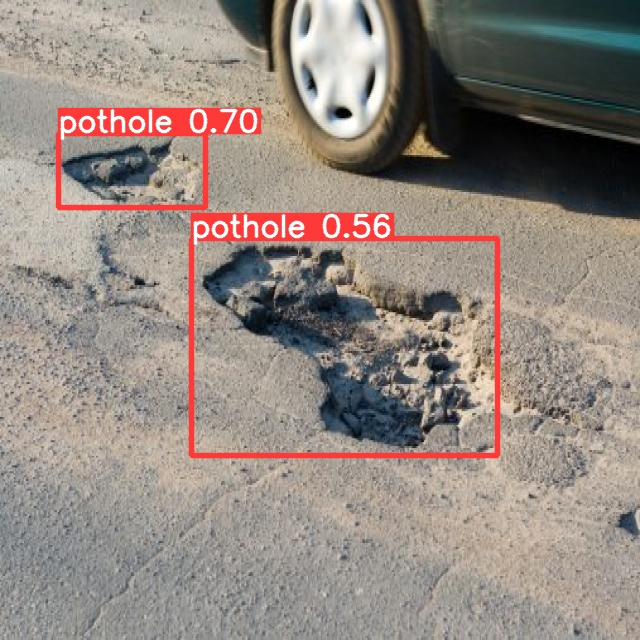

In [44]:
Image('/content/new_testset/runs/detect/predict4/52_jpg.rf.95fb88db12e4090bcac8485ac6777854.jpg')

#**Testing on a Demo Video**

In [46]:
%cd {HOME}
!gdown 'https://drive.google.com/uc?id=191krl3cz61oZCWwNyd5TLTSdUIb5HRI9&confirm=t'

/content
Downloading...
From: https://drive.google.com/uc?id=191krl3cz61oZCWwNyd5TLTSdUIb5HRI9&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 21.5MB/s]


In [48]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2024-01-06 03:50:20.884593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 03:50:20.884637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 03:50:20.885917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 03:50:22.047889: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 4 potholes

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict4/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)